<h2><i><b> <center> Title :- Credit Card Fraud Detection </center></b></i></h2>

<h4> <i> 1. Importing libraries </i> </H4>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

<h4><i>2. Reading data using Pandas </i></h4>

In [4]:
df=pd.read_csv('fraudTrain.csv')

<h4><i>3. Using head to check the top 5 rows of dataset</i></h4>

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


<h4> <b>EDA- Exploratory data Analysis </b></h4>

<h4><i>4. Using .info() to check shape and null values in dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

<h4> <i>  * There is no null values in the dataset</i></h4>

<h4> <i> checking duplicate values </i></h4>

In [7]:
df.duplicated().value_counts()

False    1296675
Name: count, dtype: int64

<h4> * there is no dupliate values in the dataset </h4>

<h4><i>5. Dropping the Irrelevant columns </i></h4>

In [8]:
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [9]:
df.drop(['first', 'last', 'unix_time'], axis=1, inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0


<h4> <i>** Calculate age using Dob column </i></h4>

In [10]:
df['dob'] = pd.to_datetime(df['dob'])
latest_dat = pd.to_datetime(df['trans_date_trans_time']).max()
df['age'] = df['dob'].apply(lambda x: latest_dat.year - x.year - ((latest_dat.month, latest_dat.day) < (x.month, x.day)))
df.drop('dob', axis=1, inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,32
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,42
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,58
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,53
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,34


<h3><i> Apply Encoding </i></h3>
<li> Frequency encoding is applied on merchant,city,state, job(because cardinality of each one is too large >400) </li>
<li> One hot encoding is applied on Category (14 diustinct values) </li>
<li> Label encoding is applied on Gender </li>
<li> extracted  street no from street column </li>

In [11]:
def encode_features(df):
    df_encoded = df.copy()  

    merchant_freq = df_encoded['merchant'].value_counts().to_dict()
    df_encoded['merchant'] = df_encoded['merchant'].map(merchant_freq)

    ohe = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
    category_encoded = ohe.fit_transform(df_encoded[['category']])
    category_cols = [f'category_{cat}' for cat in ohe.categories_[0]]
    category_df = pd.DataFrame(category_encoded, columns=category_cols, index=df_encoded.index)

    df_encoded = pd.concat([df_encoded, category_df], axis=1)
    df_encoded.drop(columns=['category'], inplace=True)

    le = LabelEncoder()
    df_encoded['gender'] = le.fit_transform(df_encoded['gender'])

    df_encoded['street'] = df_encoded['street'].str.extract(r'(\d+)', expand=False).astype(float)

    for col in ['city', 'state', 'job']:
        freq = df_encoded[col].value_counts().to_dict()
        df_encoded[col] = df_encoded[col].map(freq)

    return df_encoded


In [12]:
df_encoded = encode_features(df)

In [13]:
df_encoded.head()

,trans_date_trans_time,cc_num,merchant,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:18,2703186189652095,1267,4.97,0,561.0,2028,30266,28654,36.0788,-81.1781,3495,3545,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-01 00:00:44,630423337322,2503,107.23,0,43039.0,3545,18924,99160,48.8878,-118.2105,149,5099,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,42,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-01 00:00:51,38859492057661,1895,220.11,1,594.0,503,5545,83252,42.1808,-112.2620,4154,511,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-01 00:01:16,3534093764340240,2613,45.00,1,9443.0,493,11754,59632,46.2306,-112.1138,1939,2530,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-01 00:03:06,375534208663984,1592,41.96,1,408.0,2017,29250,24433,38.4207,-79.4629,99,2017,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
df_encoded.shape

(1296675, 32)

<h3> <i> Using transaction date and time column to extract features </i></h3>
<li> extracted hour using dt.hour </li>
<li> extracted day of the month using dt.day (this helps in understanding that a particular day of month is used for frauds) </li>
<li> extracted month using dt.month </li>
<li> extracted day_of_the week using dt.day of the week (monday=0, .. sunday=6)</li>
<li> created is night column using hour column for night (10pm-5 am) by lambda function , helps in understanding that is fraud timings </li>

In [15]:
def extract_data(df):
    
    df_encoded['trans_date_trans_time'] = pd.to_datetime(df_encoded['trans_date_trans_time'])

    df_encoded['hour'] = df_encoded['trans_date_trans_time'].dt.hour
    df_encoded['day'] = df_encoded['trans_date_trans_time'].dt.day
    df_encoded['month'] = df_encoded['trans_date_trans_time'].dt.month
    df_encoded['day_of_week'] = df_encoded['trans_date_trans_time'].dt.dayofweek
    df_encoded['is_night'] = df_encoded['hour'].apply(lambda x: 1 if x >= 22 or x <= 5 else 0)

    df_encoded.drop(columns=['trans_date_trans_time'], inplace=True)
    return df_encoded


In [16]:
df_encoded = extract_data(df)
df_encoded.head()

,cc_num,merchant,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour,day,month,day_of_week,is_night
0,2703186189652095,1267,4.97,0,561.0,2028,30266,28654,36.0788,-81.1781,3495,3545,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1
1,630423337322,2503,107.23,0,43039.0,3545,18924,99160,48.8878,-118.2105,149,5099,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,42,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1
2,38859492057661,1895,220.11,1,594.0,503,5545,83252,42.1808,-112.2620,4154,511,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1
3,3534093764340240,2613,45.00,1,9443.0,493,11754,59632,46.2306,-112.1138,1939,2530,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1
4,375534208663984,1592,41.96,1,408.0,2017,29250,24433,38.4207,-79.4629,99,2017,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,1,1


<h4> <i> dropped the transaction num column because every row has unique value its like id not useful for model </i></h4>

In [17]:
df_encoded.drop(columns=['trans_num'], inplace=True)
df_encoded.head()

,cc_num,merchant,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour,day,month,day_of_week,is_night
0,2703186189652095,1267,4.97,0,561.0,2028,30266,28654,36.0788,-81.1781,3495,3545,36.011293,-82.048315,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1
1,630423337322,2503,107.23,0,43039.0,3545,18924,99160,48.8878,-118.2105,149,5099,49.159047,-118.186462,0,42,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1
2,38859492057661,1895,220.11,1,594.0,503,5545,83252,42.1808,-112.2620,4154,511,43.150704,-112.154481,0,58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1
3,3534093764340240,2613,45.00,1,9443.0,493,11754,59632,46.2306,-112.1138,1939,2530,47.034331,-112.561071,0,53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1
4,375534208663984,1592,41.96,1,408.0,2017,29250,24433,38.4207,-79.4629,99,2017,38.674999,-78.632459,0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,1,1


In [18]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cc_num                   1296675 non-null  int64  
 1   merchant                 1296675 non-null  int64  
 2   amt                      1296675 non-null  float64
 3   gender                   1296675 non-null  int64  
 4   street                   1296675 non-null  float64
 5   city                     1296675 non-null  int64  
 6   state                    1296675 non-null  int64  
 7   zip                      1296675 non-null  int64  
 8   lat                      1296675 non-null  float64
 9   long                     1296675 non-null  float64
 10  city_pop                 1296675 non-null  int64  
 11  job                      1296675 non-null  int64  
 12  merch_lat                1296675 non-null  float64
 13  merch_long               1296675 non-null 

<h4><i> Data Visualisation </i></h4>

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\1386872115.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_labels, y=fraud_counts.values, palette='viridis')


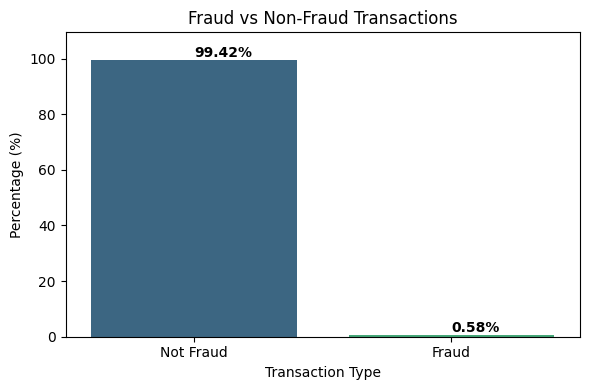

In [19]:
fraud_counts = df['is_fraud'].value_counts(normalize=True) * 100
fraud_labels = ['Not Fraud', 'Fraud']

plt.figure(figsize=(6,4))
sns.barplot(x=fraud_labels, y=fraud_counts.values, palette='viridis')
plt.title('Fraud vs Non-Fraud Transactions')
plt.ylabel('Percentage (%)')
plt.xlabel('Transaction Type')

for i, value in enumerate(fraud_counts.values):
    plt.text(i, value + 1, f'{value:.2f}%',  fontweight='bold')
plt.ylim(0, max(fraud_counts.values) + 10)
plt.tight_layout()
plt.show()

<h4><i> Above Shown bar graph tells us that data is highly imbalanced to predict </i></h4>

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\2127960442.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="Reds_r")


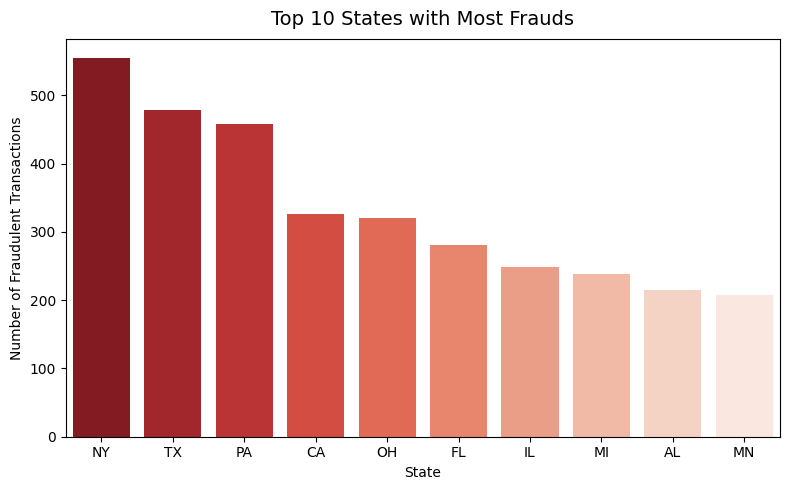

In [20]:
top_states = df[df['is_fraud'] == 1]['state'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_states.index, y=top_states.values, palette="Reds_r")
plt.title('Top 10 States with Most Frauds', fontsize=14, pad=10)
plt.ylabel('Number of Fraudulent Transactions')
plt.xlabel('State')
plt.tight_layout()
plt.show()

<h4><i> --Above shown bar graph helps in understanding that in which states most no of frauds are happening</i></b>

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\88600217.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="Purples_r")


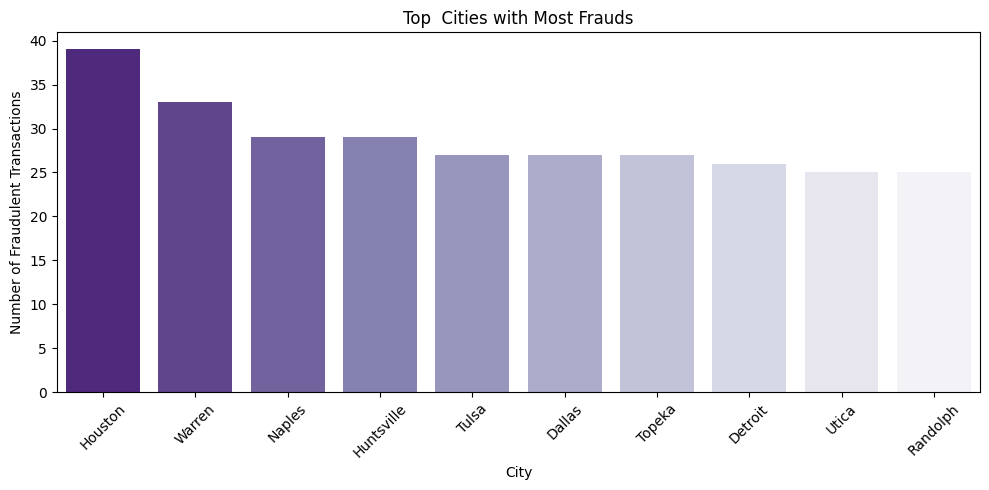

In [21]:
top_cities = df[df['is_fraud'] == 1]['city'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="Purples_r")
plt.title('Top  Cities with Most Frauds')
plt.ylabel('Number of Fraudulent Transactions')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4><i> --Above shown bar graph helps in understanding that in which cities most no of frauds are happening</i></b>

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\942998580.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_fraud.index, y=gender_fraud.values, palette='Set2')


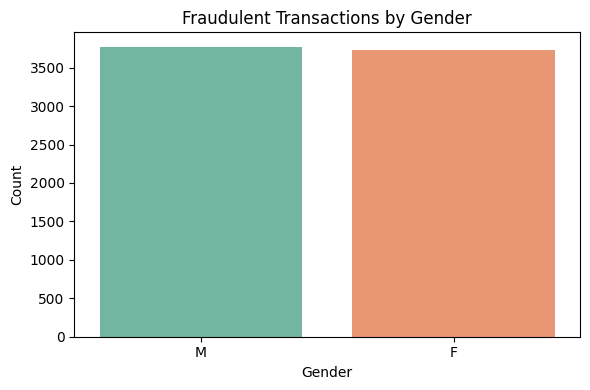

In [22]:
gender_fraud = df[df['is_fraud'] == 1]['gender'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=gender_fraud.index, y=gender_fraud.values, palette='Set2')
plt.title('Fraudulent Transactions by Gender')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

<h4><i> --Above shown helps in understanding that is there particular gender is more engaged in fraudelent activities or not</i></b>

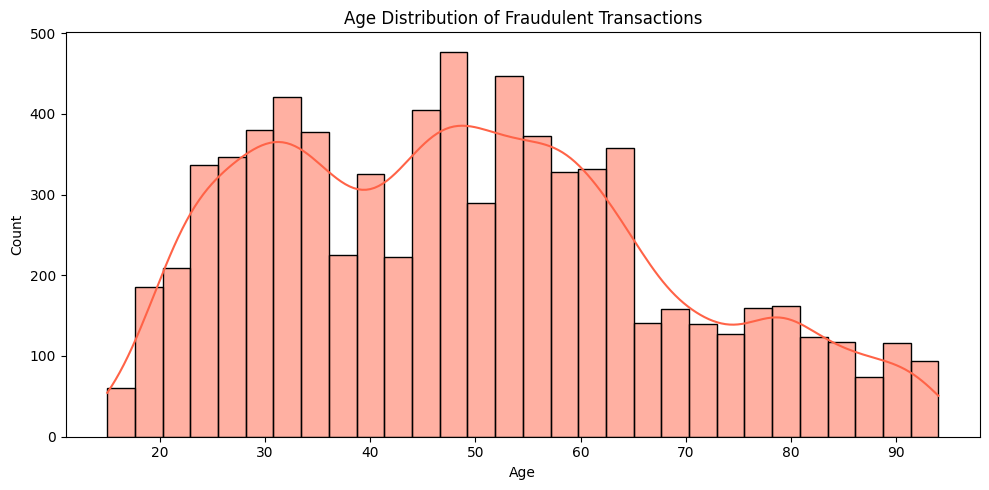

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(data=df[df['is_fraud'] == 1], x='age', bins=30, kde=True, color='tomato')
plt.title('Age Distribution of Fraudulent Transactions')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<h4><i> --Above shown histogram explains which age group is more engaged in fraudelent activities</i></b>

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\728295898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fraud_cats.index, y=top_fraud_cats.values, palette='YlOrBr')


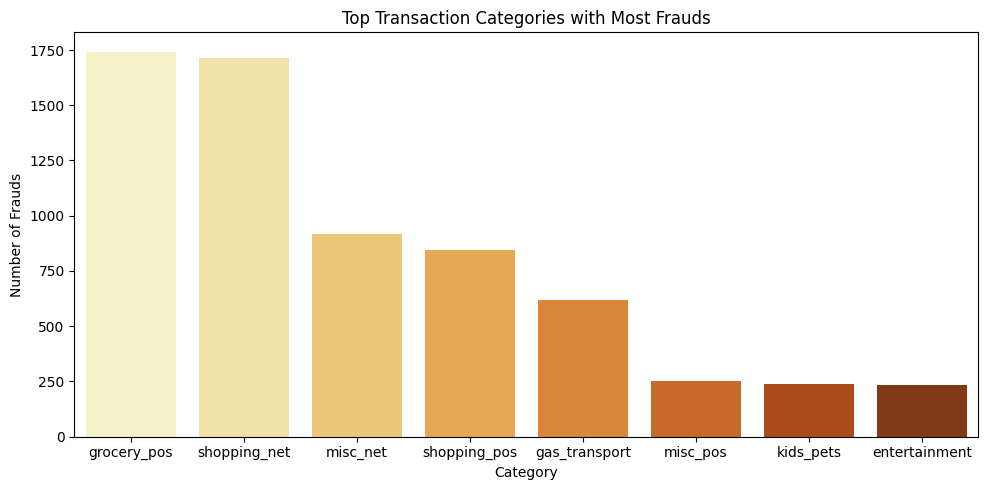

In [24]:
top_fraud_cats = df[df['is_fraud'] == 1]['category'].value_counts().head(8)

plt.figure(figsize=(10,5))
sns.barplot(x=top_fraud_cats.index, y=top_fraud_cats.values, palette='YlOrBr')
plt.title('Top Transaction Categories with Most Frauds')
plt.ylabel('Number of Frauds')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

<h4><i> --Above shown bar graph helps in understand which purchase cateogery have most no of fraudelent activities</i></b>

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3583732267.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_encoded[df_encoded['is_fraud'] == 1], x='weekday_name', order=list(day_map.values()), palette='coolwarm')


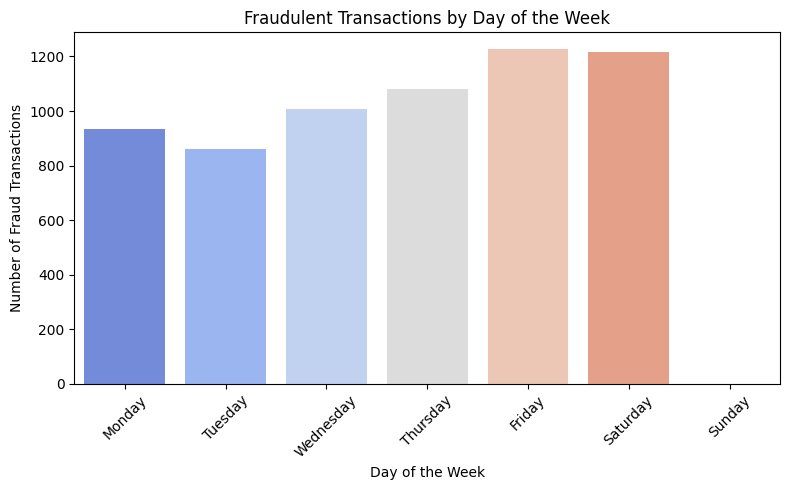

In [25]:
day_map = {
    1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df_encoded['weekday_name'] = df_encoded['day_of_week'].map(day_map)

plt.figure(figsize=(8,5))
sns.countplot(data=df_encoded[df_encoded['is_fraud'] == 1], x='weekday_name', order=list(day_map.values()), palette='coolwarm')
plt.title('Fraudulent Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h4> <i>-- above bar chart helps in identifying is there any particular day on which most of the  frauds are happening </i></h4>

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\2793857382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_encoded[df_encoded['is_fraud'] == 1], x='time_period', palette='mako')


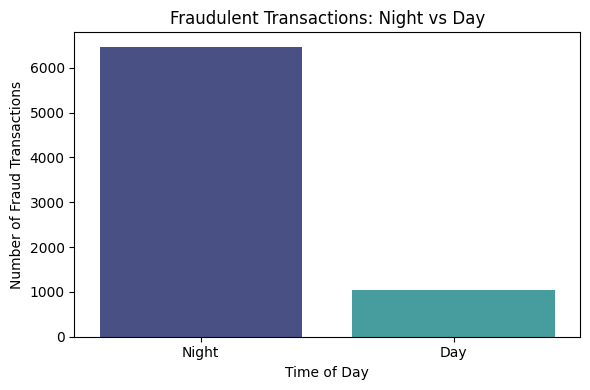

In [26]:

df_encoded['time_period'] = df_encoded['is_night'].map({1: 'Night', 0: 'Day'})

plt.figure(figsize=(6,4))
sns.countplot(data=df_encoded[df_encoded['is_fraud'] == 1], x='time_period', palette='mako')
plt.title('Fraudulent Transactions: Night vs Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Fraud Transactions')
plt.tight_layout()
plt.show()


<h4><i> --Bar chart shows that most of fraudelent transactions are happening mostly at night </i></b>

In [27]:
df_encoded.head()

,cc_num,merchant,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour,day,month,day_of_week,is_night,weekday_name,time_period
0,2703186189652095,1267,4.97,0,561.0,2028,30266,28654,36.0788,-81.1781,3495,3545,36.011293,-82.048315,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1,Monday,Night
1,630423337322,2503,107.23,0,43039.0,3545,18924,99160,48.8878,-118.2105,149,5099,49.159047,-118.186462,0,42,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1,Monday,Night
2,38859492057661,1895,220.11,1,594.0,503,5545,83252,42.1808,-112.2620,4154,511,43.150704,-112.154481,0,58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1,Monday,Night
3,3534093764340240,2613,45.00,1,9443.0,493,11754,59632,46.2306,-112.1138,1939,2530,47.034331,-112.561071,0,53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1,Monday,Night
4,375534208663984,1592,41.96,1,408.0,2017,29250,24433,38.4207,-79.4629,99,2017,38.674999,-78.632459,0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,1,1,Monday,Night


In [28]:
df_encoded.drop(columns=['weekday_name','time_period'], inplace=True)
df_encoded.head()

,cc_num,merchant,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour,day,month,day_of_week,is_night
0,2703186189652095,1267,4.97,0,561.0,2028,30266,28654,36.0788,-81.1781,3495,3545,36.011293,-82.048315,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1
1,630423337322,2503,107.23,0,43039.0,3545,18924,99160,48.8878,-118.2105,149,5099,49.159047,-118.186462,0,42,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1
2,38859492057661,1895,220.11,1,594.0,503,5545,83252,42.1808,-112.2620,4154,511,43.150704,-112.154481,0,58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1
3,3534093764340240,2613,45.00,1,9443.0,493,11754,59632,46.2306,-112.1138,1939,2530,47.034331,-112.561071,0,53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1
4,375534208663984,1592,41.96,1,408.0,2017,29250,24433,38.4207,-79.4629,99,2017,38.674999,-78.632459,0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,1,1


<h4><i><b>Correlation Analysis </b></i></h4>

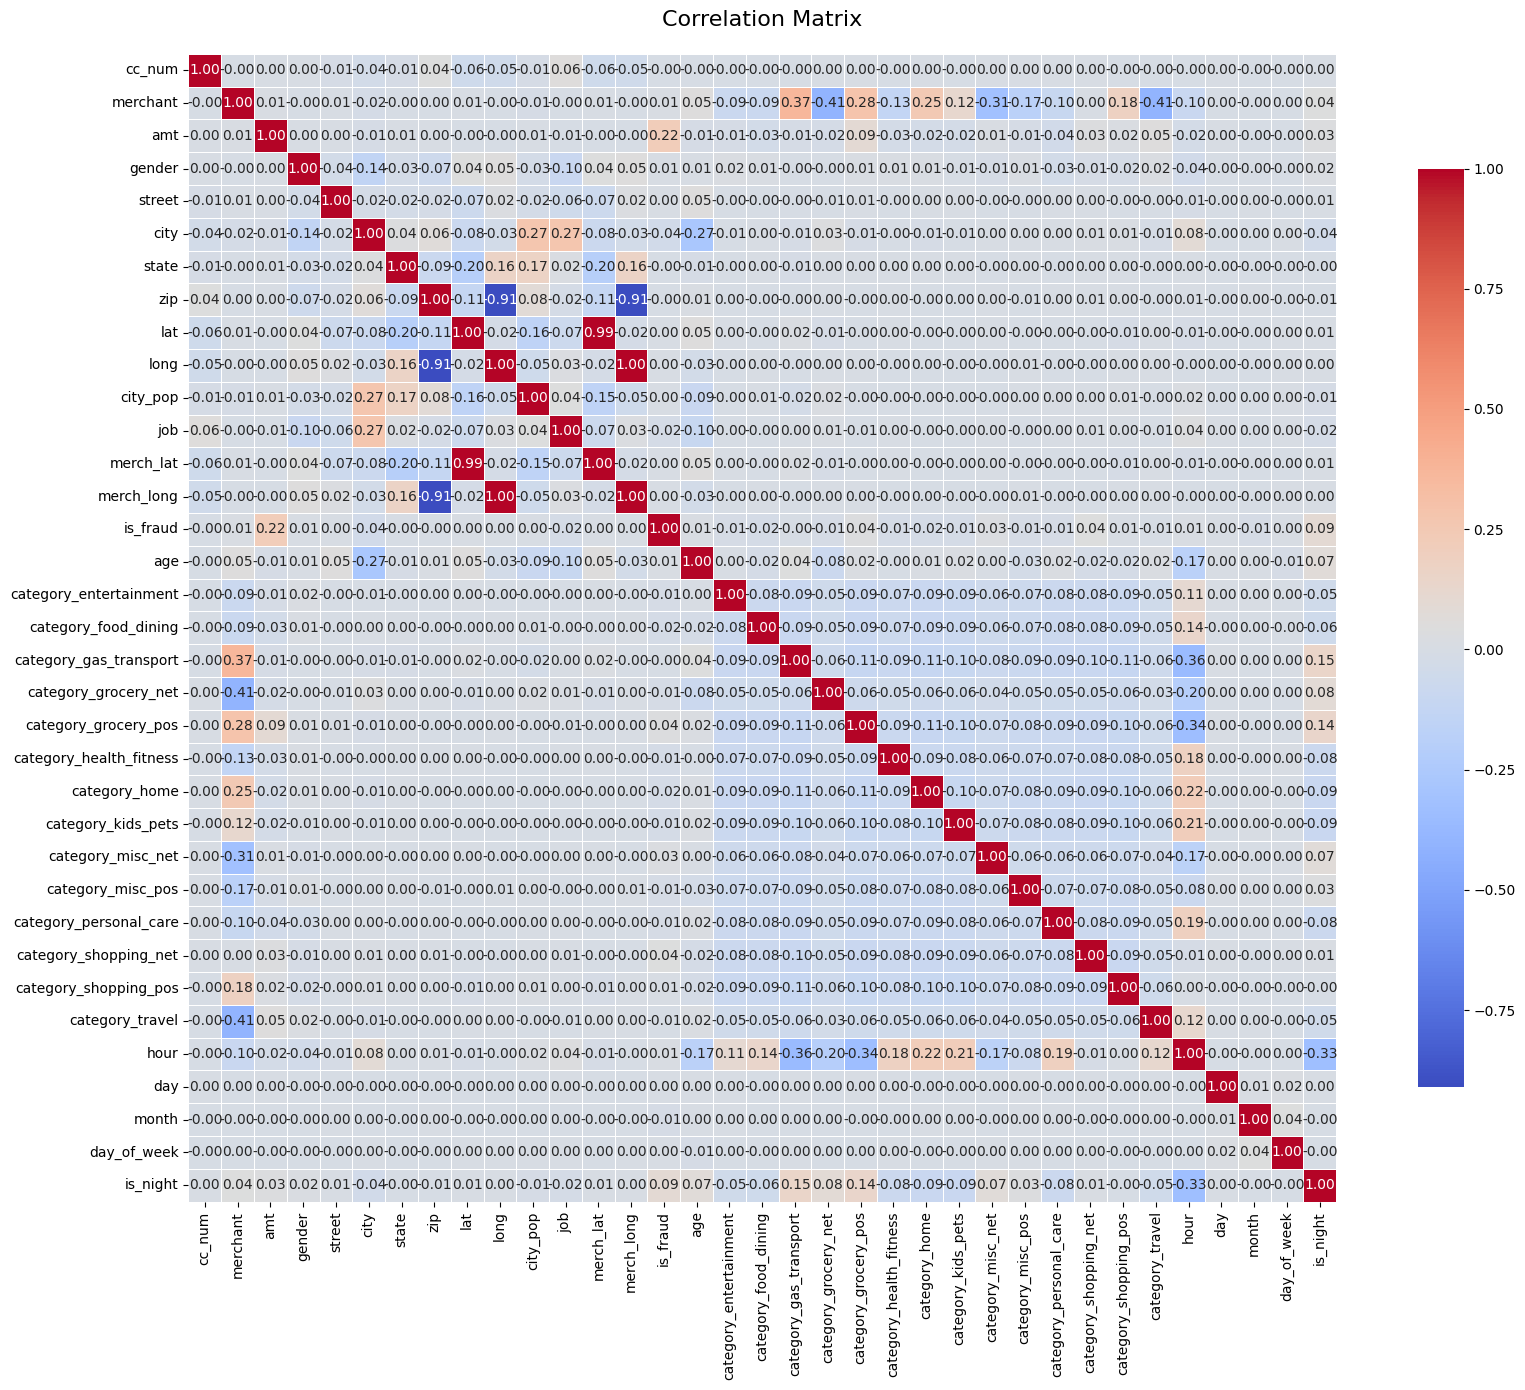

In [29]:
correlation_matrix = df_encoded.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": .8})

plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

<h4><i> we are getting high correlation in lat, long with merchant lat and long </i></h4>

In [30]:
df_encoded.drop(['merch_lat', 'merch_long'], axis=1, inplace=True)
df_encoded.head(2)

,cc_num,merchant,amt,gender,street,city,state,zip,lat,long,city_pop,job,is_fraud,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour,day,month,day_of_week,is_night
0,2703186189652095,1267,4.97,0,561.0,2028,30266,28654,36.0788,-81.1781,3495,3545,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1
1,630423337322,2503,107.23,0,43039.0,3545,18924,99160,48.8878,-118.2105,149,5099,0,42,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1


<h4><i> <b> Outlier analysis </b></i></h4>

In [31]:
df_encoded.describe()

,cc_num,merchant,amt,gender,street,city,state,zip,lat,long,city_pop,job,is_fraud,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour,day,month,day_of_week,is_night
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,2.047770e+03,7.035104e+01,4.525513e-01,1.479708e+04,2.063746e+03,4.097532e+04,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,3.938490e+03,5.788652e-03,4.621255e+01,7.250390e-02,7.053502e-02,1.015359e-01,3.505273e-02,9.535003e-02,6.623017e-02,9.494669e-02,8.717296e-02,4.880714e-02,6.143020e-02,6.999287e-02,7.522548e-02,8.997783e-02,3.123913e-02,1.280486e+01,1.558798e+01,6.142150e+00,3.070604e+00,2.999333e-01
std,1.308806e+18,5.303418e+02,1.603160e+02,4.977437e-01,2.441096e+04,1.002234e+03,2.548072e+04,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,2.019214e+03,7.586269e-02,1.738738e+01,2.593205e-01,2.560466e-01,3.020371e-01,1.839132e-01,2.936979e-01,2.486841e-01,2.931414e-01,2.820885e-01,2.154647e-01,2.401178e-01,2.551351e-01,2.637549e-01,2.861501e-01,1.739634e-01,6.817824e+00,8.829121e+00,3.417703e+00,2.198153e+00,4.582286e-01
min,6.041621e+10,7.270000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,9.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,7.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.800429e+14,1.783000e+03,9.650000e+00,0.000000e+00,6.220000e+02,1.514000e+03,2.416800e+04,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,2.528000e+03,0.000000e+00,3.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00
50%,3.521417e+15,1.985000e+03,4.752000e+01,0.000000e+00,3.638000e+03,2.034000e+03,3.026600e+04,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,3.602000e+03,0.000000e+00,4.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,1.500000e+01,6.000000e+00,3.000000e+00,0.000000e+00
75%,4.642255e+15,2.444000e+03,8.314000e+01,1.000000e+00,9.808000e+03,2.577000e+03,4.648000e+04,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,5.460000e+03,0.000000e+00,5.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e+01,2.300000e+01,9.000000e+00,5.000000e+00,1.000000e+00
max,4.992346e+18,4.403000e+03,2.894890e+04,1.000000e+00,9.973600e+04,5.617000e+03,9.487600e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,9.779000e+03,1.000000e+00,9.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.300000e+01,3.100000e+01,1.200000e+01,6.000000e+00,1.000000e+00


C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


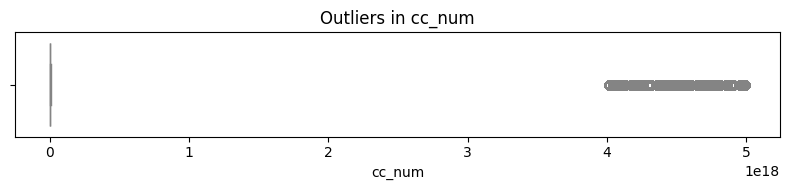

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


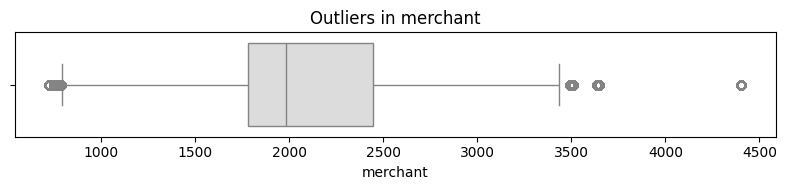

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


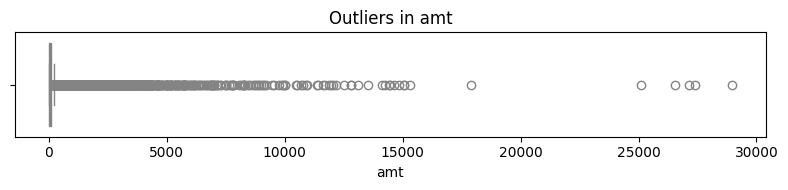

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


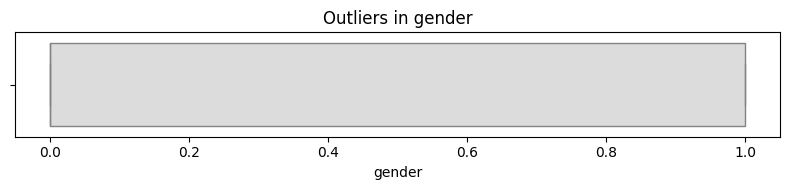

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


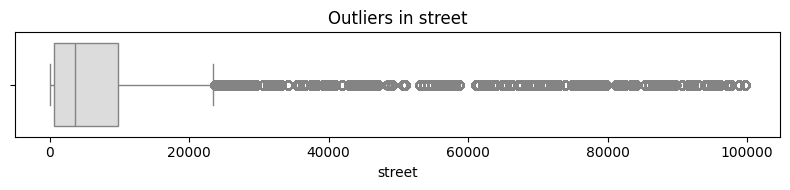

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


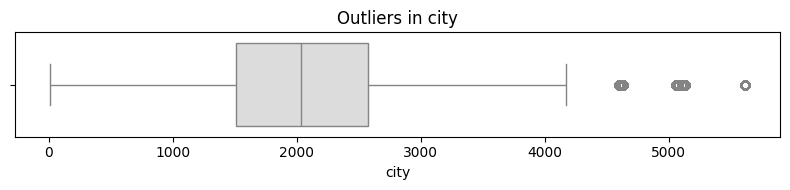

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


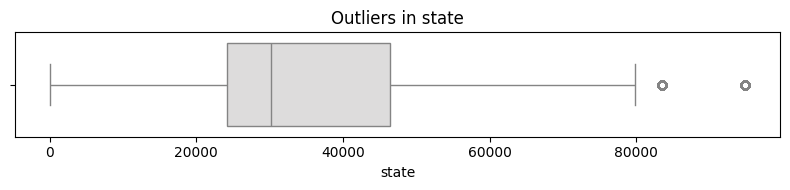

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


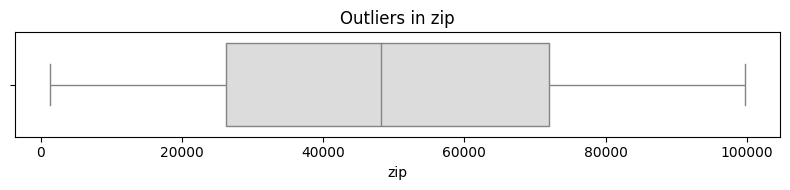

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


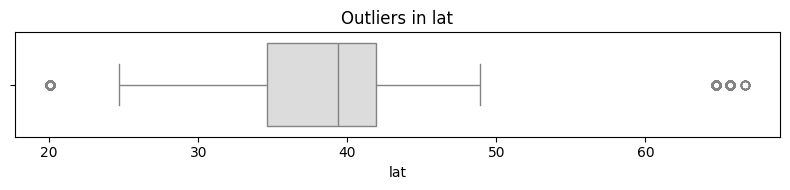

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


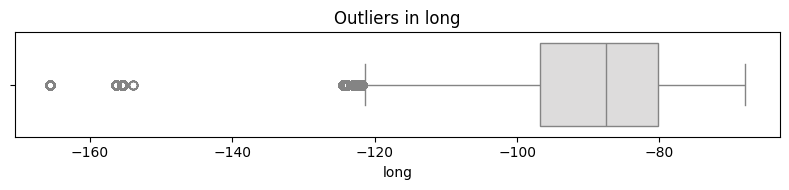

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


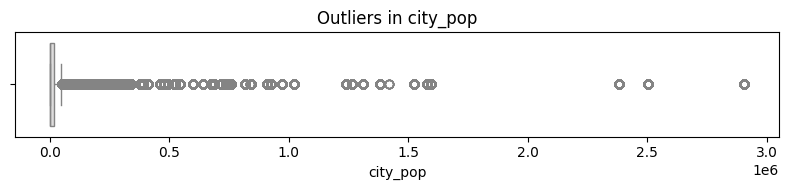

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


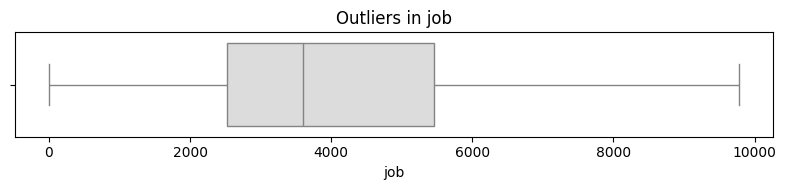

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


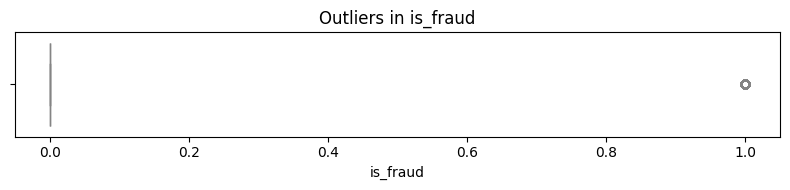

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


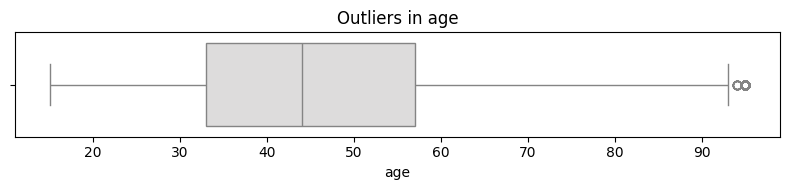

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


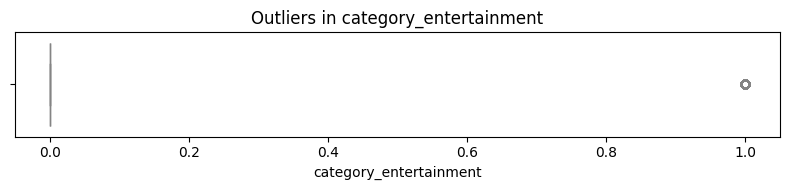

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


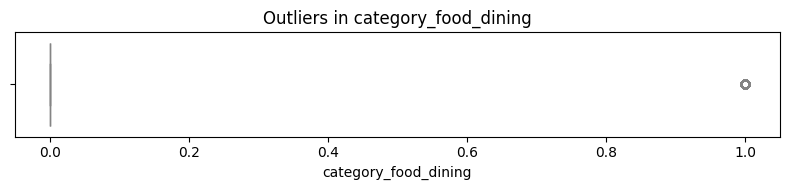

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


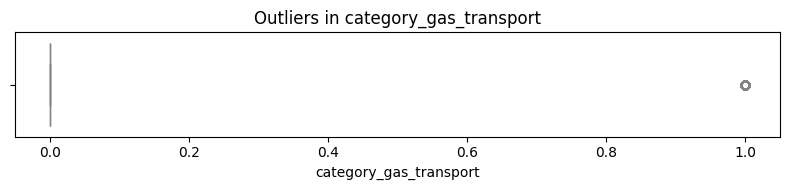

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


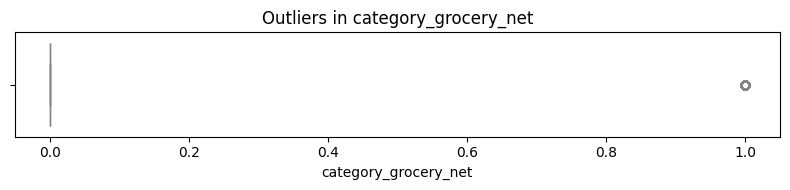

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


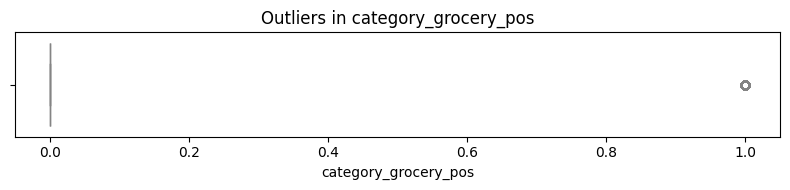

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


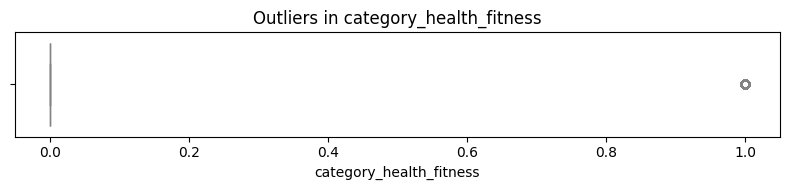

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


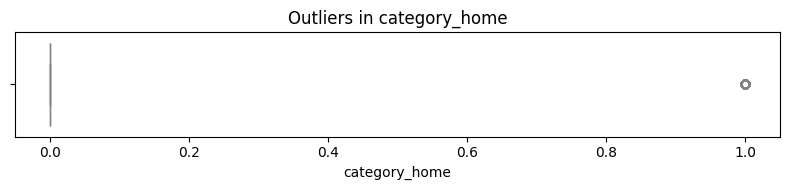

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


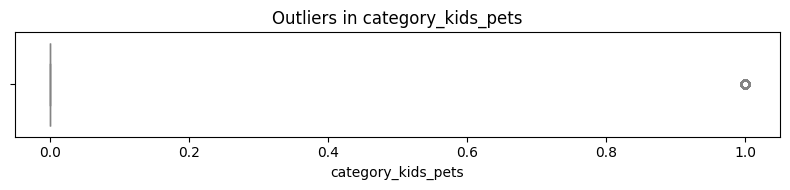

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


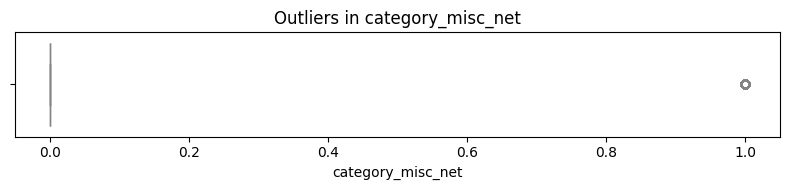

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


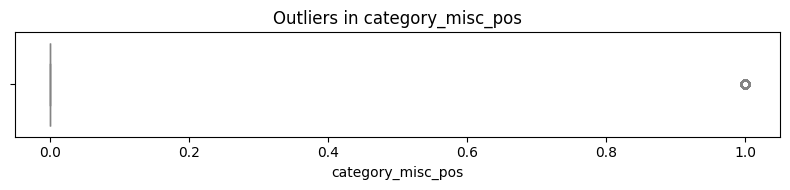

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


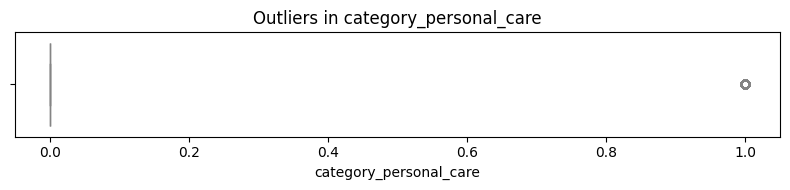

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


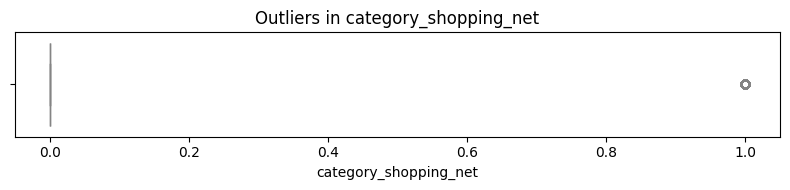

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


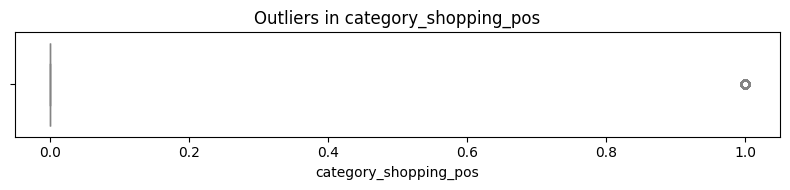

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


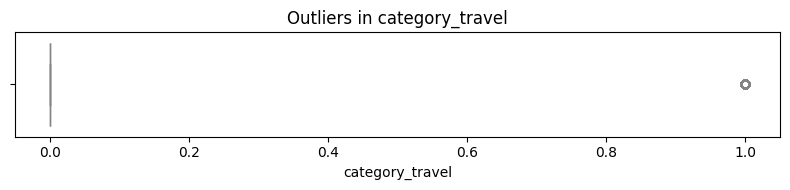

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


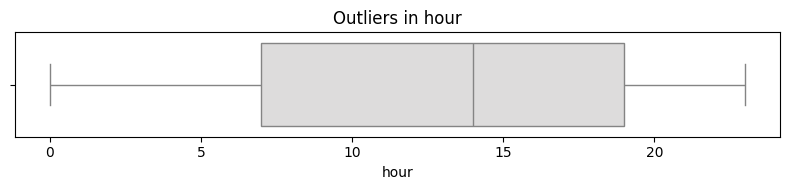

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


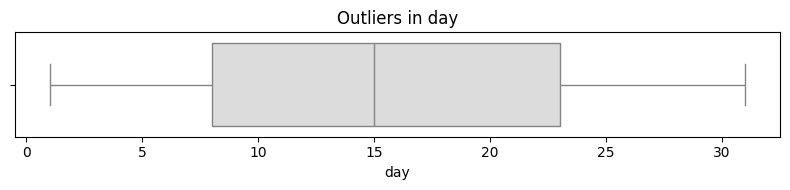

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


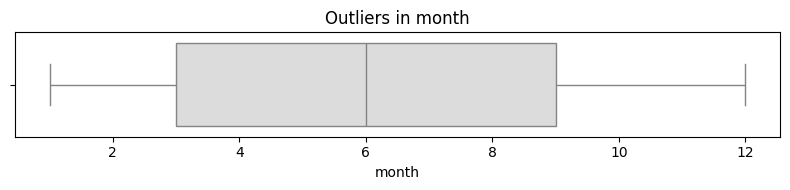

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


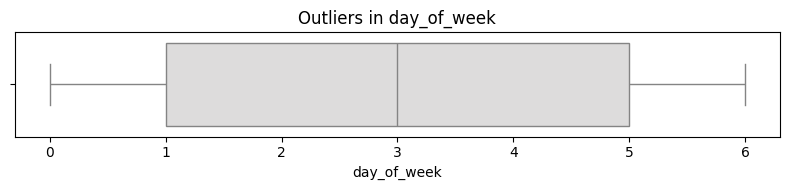

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3185068839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded[col], palette='coolwarm')


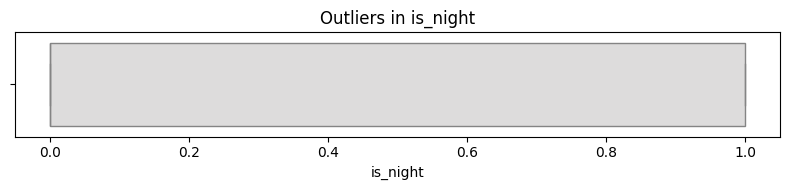

In [32]:
numeric_cols = df_encoded.select_dtypes(include=['int', 'float']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 2)) 
    sns.boxplot(x=df_encoded[col], palette='coolwarm')
    plt.title(f'Outliers in {col}')
    plt.tight_layout()
    plt.show()

<h4><i> Function for outlier removal and Scaling </i></h4>

In [33]:
from sklearn.preprocessing import StandardScaler

def preprocess(df):
    for col in ['merchant', 'city', 'state']:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    scaler = StandardScaler()
    for col in ['city_pop', 'street']:
        if col in df.columns:
            df[col] = scaler.fit_transform(df[[col]])
    
    return df


In [34]:

df_encoded = preprocess(df_encoded)

In [35]:
df_encoded.head(4)

,cc_num,merchant,amt,gender,street,city,state,zip,lat,long,city_pop,job,is_fraud,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour,day,month,day_of_week,is_night
0,2703186189652095,1267,4.97,0,-0.585587,2028,30266,28654,36.0788,-81.1781,-0.312642,3545,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1
1,630423337322,2503,107.23,0,1.158988,3545,18924,99160,48.8878,-118.2105,-0.330739,5099,0,42,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1
2,38859492057661,1895,220.11,1,-0.584232,503,5545,83252,42.1808,-112.2620,-0.309078,511,0,58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1
3,3534093764340240,2613,45.00,1,-0.220803,493,11754,59632,46.2306,-112.1138,-0.321058,2530,0,53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1


In [36]:
df_encoded.shape

(1061428, 33)

<h3><i><b> now we will repeat the encoding process on Test data </b></i></h3>

In [37]:
df_test=pd.read_csv('fraudTest.csv')
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


<h4><i>checking missing values and other infos </i></h4>

In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

<h4><i> **There is no missing values in test data </i></h4>

<h4><i>dropping irrelevant columns </i></h4>

In [39]:
df_test = df_test.loc[:, ~df_test.columns.str.contains("^Unnamed")]
df_test.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


In [40]:
df_test.drop(columns=['first', 'last', 'unix_time'], axis=1, inplace=True)
df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,44.959148,-85.884734,0


<h4> <i>** Calculate age using Dob column on Test data</i></h4>

In [41]:
df_test['dob'] = pd.to_datetime(df_test['dob'])
latest_dat = pd.to_datetime(df_test['trans_date_trans_time']).max()
df_test['age'] = df_test['dob'].apply(lambda x: latest_dat.year - x.year - ((latest_dat.month, latest_dat.day) < (x.month, x.day)))
df_test.drop('dob', axis=1, inplace=True)
df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,age
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,33.986391,-81.200714,0,52
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,39.450498,-109.960431,0,30
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,40.495810,-74.196111,0,50
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,2159175b9efe66dc301f149d3d5abf8c,28.812398,-80.883061,0,33
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,57ff021bd3f328f8738bb535c302a31b,44.959148,-85.884734,0,65


<h3><i> Apply Encoding on Test data</i></h3>
<li> Frequency encoding is applied on merchant,city,state, job(because cardinality of each one is too large >400) </li>
<li> One hot encoding is applied on Category (14 diustinct values) </li>
<li> Label encoding is applied on Gender </li>
<li> extracted  street no from street column </li>

In [42]:
df_test_encoded = encode_features(df_test)

In [43]:
df_test_encoded.head()

,trans_date_trans_time,cc_num,merchant,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2020-06-21 12:14:25,2291163933867244,736,2.86,1,351.0,640,12541,29209,33.9659,-80.9355,333497,2430,2da90c7d74bd46a0caf3777415b3ebd3,33.986391,-81.200714,0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2020-06-21 12:14:33,3573030041201292,785,29.84,0,3638.0,837,4658,84002,40.3207,-110.4360,302,2535,324cc204407e99f51b0d6ca0055005e7,39.450498,-109.960431,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2020-06-21 12:14:53,3598215285024754,755,41.28,0,9333.0,1073,35918,11710,40.6729,-73.5365,34496,2587,c81755dbbbea9d5c77f094348a7579be,40.495810,-74.196111,0,50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-06-21 12:15:15,3591919803438423,711,60.05,1,32941.0,663,18104,32780,28.5697,-80.8191,54767,663,2159175b9efe66dc301f149d3d5abf8c,28.812398,-80.883061,0,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2020-06-21 12:15:17,3526826139003047,370,3.19,1,5783.0,891,19671,49632,44.2529,-85.0170,1126,891,57ff021bd3f328f8738bb535c302a31b,44.959148,-85.884734,0,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<h3> <i> Using transaction date and time column to extract features on Test data </i></h3>
<li> extracted hour using dt.hour </li>
<li> extracted day of the month using dt.day (this helps in understanding that a particular day of month is used for frauds) </li>
<li> extracted month using dt.month </li>
<li> extracted day_of_the week using dt.day of the week (monday=0, .. sunday=6)</li>
<li> created is night column using hour column for night (10pm-5 am) by lambda function , helps in understanding that is fraud timings </li>

In [44]:
def extract_data(df_test_encoded):
    
    df_test_encoded['trans_date_trans_time'] = pd.to_datetime(df_test_encoded['trans_date_trans_time'])

    df_test_encoded['hour'] = df_test_encoded['trans_date_trans_time'].dt.hour
    df_test_encoded['day'] = df_test_encoded['trans_date_trans_time'].dt.day
    df_test_encoded['month'] = df_test_encoded['trans_date_trans_time'].dt.month
    df_test_encoded['day_of_week'] = df_test_encoded['trans_date_trans_time'].dt.dayofweek
    df_test_encoded['is_night'] = df_test_encoded['hour'].apply(lambda x: 1 if x >= 22 or x <= 5 else 0)

    df_test_encoded.drop(columns=['trans_date_trans_time'], inplace=True)
    return df_test_encoded

In [45]:
df_test_encoded = extract_data(df_test_encoded)
df_test_encoded.head()

,cc_num,merchant,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour,day,month,day_of_week,is_night
0,2291163933867244,736,2.86,1,351.0,640,12541,29209,33.9659,-80.9355,333497,2430,2da90c7d74bd46a0caf3777415b3ebd3,33.986391,-81.200714,0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12,21,6,6,0
1,3573030041201292,785,29.84,0,3638.0,837,4658,84002,40.3207,-110.4360,302,2535,324cc204407e99f51b0d6ca0055005e7,39.450498,-109.960431,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12,21,6,6,0
2,3598215285024754,755,41.28,0,9333.0,1073,35918,11710,40.6729,-73.5365,34496,2587,c81755dbbbea9d5c77f094348a7579be,40.495810,-74.196111,0,50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,21,6,6,0
3,3591919803438423,711,60.05,1,32941.0,663,18104,32780,28.5697,-80.8191,54767,663,2159175b9efe66dc301f149d3d5abf8c,28.812398,-80.883061,0,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12,21,6,6,0
4,3526826139003047,370,3.19,1,5783.0,891,19671,49632,44.2529,-85.0170,1126,891,57ff021bd3f328f8738bb535c302a31b,44.959148,-85.884734,0,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,21,6,6,0


In [46]:
df_test_encoded.drop(columns=['trans_num'], inplace=True)
df_test_encoded.head()

,cc_num,merchant,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour,day,month,day_of_week,is_night
0,2291163933867244,736,2.86,1,351.0,640,12541,29209,33.9659,-80.9355,333497,2430,33.986391,-81.200714,0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12,21,6,6,0
1,3573030041201292,785,29.84,0,3638.0,837,4658,84002,40.3207,-110.4360,302,2535,39.450498,-109.960431,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12,21,6,6,0
2,3598215285024754,755,41.28,0,9333.0,1073,35918,11710,40.6729,-73.5365,34496,2587,40.495810,-74.196111,0,50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,21,6,6,0
3,3591919803438423,711,60.05,1,32941.0,663,18104,32780,28.5697,-80.8191,54767,663,28.812398,-80.883061,0,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12,21,6,6,0
4,3526826139003047,370,3.19,1,5783.0,891,19671,49632,44.2529,-85.0170,1126,891,44.959148,-85.884734,0,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,21,6,6,0


In [47]:
df_test_encoded.drop(['merch_lat', 'merch_long'], axis=1, inplace=True)
df_test_encoded.head(2)

,cc_num,merchant,amt,gender,street,city,state,zip,lat,long,city_pop,job,is_fraud,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour,day,month,day_of_week,is_night
0,2291163933867244,736,2.86,1,351.0,640,12541,29209,33.9659,-80.9355,333497,2430,0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12,21,6,6,0
1,3573030041201292,785,29.84,0,3638.0,837,4658,84002,40.3207,-110.4360,302,2535,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12,21,6,6,0


In [48]:

df_test_encoded = preprocess(df_test_encoded)

In [49]:
df_test_encoded.head(4)

,cc_num,merchant,amt,gender,street,city,state,zip,lat,long,city_pop,job,is_fraud,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,hour,day,month,day_of_week,is_night
0,2291163933867244,736,2.86,1,-0.594443,640,12541,29209,33.9659,-80.9355,1.466022,2430,0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12,21,6,6,0
1,3573030041201292,785,29.84,0,-0.459244,837,4658,84002,40.3207,-110.4360,-0.328715,2535,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12,21,6,6,0
3,3591919803438423,711,60.05,1,0.746037,663,18104,32780,28.5697,-80.8191,-0.035342,663,0,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12,21,6,6,0
4,3526826139003047,370,3.19,1,-0.371016,891,19671,49632,44.2529,-85.0170,-0.324276,891,0,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,21,6,6,0


In [50]:
df_test_encoded.shape

(453216, 33)

<h3><center><i><b> Our target variable is :- is fraud </b></i></center></h3>

In [52]:
pip install scikit-learn imbalanced-learn xgboost lightgbm catboost



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 2.8 MB/s eta 0:00:54
   ---------------------------------------- 1.6/150.0 MB 4.0 MB/s eta 0:00:38
    --------------------------------------- 2.4/150.0 MB 4.1 MB/s eta 0:00:37
    --------------------------------------- 3.4/150.0 MB 4.3 MB/s eta 0:00:35
   - -------------------------------------- 4.7/150.0 MB 4.7 MB/s eta 0:00:32
   - -------------------------------------- 5.8/150.0 MB 4.8 MB/s eta 0:00:31
   - -------------------------------------- 6.8/150.0 MB 4.8 MB/s eta 0:00:31
   -- ------------------------------------- 7.6/150.0 MB 4.6 MB/s eta 0:00:31
   -- ------------------------------------- 8.1/150.0 MB 4.4 MB/s eta 0:00:33
   -- ------------------------------------- 8.1/150.0 MB 4.4 MB/s eta 0:00:33
   -- ------------------------------------- 8.9/150.0 MB 4.0 MB/s eta 0:00:36
   -- ------------------------------------- 9.7/150.0 MB 4.0 MB/s eta 

<h4><i>Importing libraries </i></h4>

In [53]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

In [54]:
X_train = df_encoded.drop('is_fraud', axis=1)
y_train = df_encoded['is_fraud']

X_test = df_test_encoded.drop('is_fraud', axis=1)
y_test = df_test_encoded['is_fraud']

In [55]:
results_df = pd.DataFrame(columns=[
    'Model', 'Train Accuracy', 'Test Accuracy', 
    'Test Precision', 'Test Recall', 'Test F1'
])

In [56]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results = {
        'Model': name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Test Precision': precision_score(y_test, y_test_pred, zero_division=0),
        'Test Recall': recall_score(y_test, y_test_pred, zero_division=0),
        'Test F1': f1_score(y_test, y_test_pred, zero_division=0)
    }

    return results


<h4><i>Models </i></h4>

In [57]:
model = LogisticRegression(max_iter=1000)
metrics = evaluate_model("Logistic Regression", model, X_train, y_train, X_test, y_test)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14828\3898222716.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)


In [58]:
model = DecisionTreeClassifier()
metrics = evaluate_model("Decision Tree", model, X_train, y_train, X_test, y_test)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

In [59]:
model = RandomForestClassifier()
metrics = evaluate_model("Random Forest", model, X_train, y_train, X_test, y_test)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

In [60]:
model = GradientBoostingClassifier()
metrics = evaluate_model("Gradient Boosting", model, X_train, y_train, X_test, y_test)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

In [ ]:
model = ExtraTreesClassifier()
metrics = evaluate_model("Extra Trees", model)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)
results_df

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
metrics = evaluate_model("XGBoost", model)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)
results_df

In [ ]:
model = LGBMClassifier()
metrics = evaluate_model("LightGBM", model)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)
results_df

In [ ]:
model = CatBoostClassifier(verbose=0)
metrics = evaluate_model("CatBoost", model)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)
results_df

<h4><i>Results </i></h4>

In [ ]:
results_df

,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1,Test ROC AUC
0,Logistic Regression,0.994196,0.996132,0.0,0.0,0.0,NaN


<h4><i><b>Now we will use SMOTE to reduce the data imbalance </b></i></h4>

print("Before SMOTE:", Counter(y_train))

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
print("After SMOTE:", Counter(y_train))

In [ ]:
print("After SMOTE:", Counter(y_train))

<h4><i> Re-run all the models on SMOTE applied dataset to ckeck if there is increase in accuracy or not </i></h4>

In [ ]:
model = LogisticRegression(max_iter=1000)
metrics = evaluate_model("SMOTE - Logistic Regression", model, X_train, y_train, X_test, y_test)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

In [ ]:
model = DecisionTreeClassifier()
metrics = evaluate_model("SMOTE - Decision Tree", model, X_train, y_train, X_test, y_test)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

In [ ]:
model = RandomForestClassifier()
metrics = evaluate_model("SMOTE - Random Forest", model, X_train, y_train, X_test, y_test)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

In [ ]:
model = ExtraTreesClassifier()
metrics = evaluate_model("SMOTE - Extra Trees", model, X_train, y_train, X_test, y_test)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

In [ ]:
model = SVC(probability=True)
metrics = evaluate_model("SMOTE - SVM", model, X_train, y_train, X_test, y_test)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

In [ ]:
model = GradientBoostingClassifier()
metrics = evaluate_model("SMOTE - Gradient Boosting", model, X_train, y_train, X_test, y_test)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
metrics = evaluate_model("SMOTE - XGBoost", model, X_train, y_train, X_test, y_test)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

In [ ]:
model = LGBMClassifier()
metrics = evaluate_model("SMOTE - LightGBM", model, X_train, y_train, X_test, y_test)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

In [ ]:
model = CatBoostClassifier(verbose=0)
metrics = evaluate_model("SMOTE - CatBoost", model, X_train, y_train, X_test, y_test)
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)


<h4><i>Results </i></h4>

In [ ]:
results_df